In [1]:
import pandas, numpy

In [2]:
import matplotlib, matplotlib.pyplot
matplotlib.rcParams.update({'font.size':20, 
                            'font.family':'sans-serif', 
                            'xtick.labelsize':16, 
                            'ytick.labelsize':16, 
                            'figure.figsize':(16*(2/3), 9*(2/3)), 
                            'axes.labelsize':20
                           })

# user-defined variables

In [3]:
data_folder = '/Users/adrian/research/akureyri/results/deseq2_pipeline/'
expression_file = '/Users/adrian/research/akureyri/results/deseq2_pipeline/DESeq2_TPM_values.tsv'
metadata_file = '/Users/adrian/research/akureyri/results/deseq2_pipeline/metadata.tsv'
annotation_file = '/Users/adrian/research/akureyri/results/deseq2_pipeline/annotation.tsv'
results_dir = '/Users/adrian/research/akureyri/results/deseq2_pipeline/'

tpm_threshold = 2

# read info

In [4]:
tpm = pandas.read_csv(expression_file, sep='\t', index_col=0)
tpm.head()

,test01,test02,test03,test04,test05,test06,test07,test08,test09,test10,test11,test12
ENSG00000000003,12.480951,14.500356,12.973101,13.639502,13.056435,15.536032,13.025809,11.380208,14.604471,16.337347,14.475374,13.477217
ENSG00000000005,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
ENSG00000000419,120.981242,107.924893,120.233355,105.070478,117.550878,101.073762,123.991231,93.626046,123.207637,97.723357,93.615215,112.974659
ENSG00000000457,3.624791,5.523426,3.872989,3.323551,2.324639,5.041956,4.175279,4.372463,4.307249,5.125585,4.414247,4.047019
ENSG00000000460,15.407117,10.366913,12.076084,17.697199,11.087450,8.450714,11.056973,21.588369,17.890017,9.149726,18.332927,18.389641


In [5]:
metadata = pandas.read_csv(metadata_file, sep='\t')
metadata.head()

,sample,label,time,culture,path
1,test01,RNA_test_1_EKRN230071387-1A,two,2D,/Users/adrian/research/akureyri/results/kallis...
3,test02,RNA_test_2_EKRN230071388-1A,two,3D,/Users/adrian/research/akureyri/results/kallis...
5,test03,RNA_test_3_EKRN230071389-1A,fourteen,2D,/Users/adrian/research/akureyri/results/kallis...
7,test04,RNA_test_4_EKRN230071390-1A,fourteen,3D,/Users/adrian/research/akureyri/results/kallis...
9,test05,RNA_test_5_EKRN230071391-1A,two,2D,/Users/adrian/research/akureyri/results/kallis...


In [6]:
annotation = pandas.read_csv(annotation_file, sep='\t')
annotation.head()

,Unnamed: 0,ensembl_transcript_id,ensembl_gene_id,external_gene_name,gene_biotype,description
0,1,ENST00000387314,ENSG00000210049,MT-TF,Mt_tRNA,mitochondrially encoded tRNA-Phe (UUU/C) [Sour...
1,2,ENST00000389680,ENSG00000211459,MT-RNR1,Mt_rRNA,mitochondrially encoded 12S rRNA [Source:HGNC ...
2,3,ENST00000387342,ENSG00000210077,MT-TV,Mt_tRNA,mitochondrially encoded tRNA-Val (GUN) [Source...
3,4,ENST00000387347,ENSG00000210082,MT-RNR2,Mt_rRNA,mitochondrially encoded 16S rRNA [Source:HGNC ...
4,5,ENST00000386347,ENSG00000209082,MT-TL1,Mt_tRNA,mitochondrially encoded tRNA-Leu (UUA/G) 1 [So...


# contrasts

effect_time_2D.tsv	culture	2D	time	True
(372, 6)
                    baseMean  log2FoldChange     lfcSE       stat  \
ENSG00000001630  1618.261097       -1.374572  0.358075  14.224734   
ENSG00000004399  1357.951804       -1.023238  0.296851  11.653545   
ENSG00000005379   145.506076        2.326498  0.511577  18.968687   
ENSG00000012171  1044.301020        1.529732  0.445552  11.282379   
ENSG00000013016  1997.803434        1.504968  0.163086  81.894884   

                       pvalue          padj  
ENSG00000001630  1.622242e-04  7.967120e-03  
ENSG00000004399  6.408030e-04  2.279408e-02  
ENSG00000005379  1.328814e-05  1.102102e-03  
ENSG00000012171  7.824623e-04  2.617224e-02  
ENSG00000013016  1.435203e-19  1.166533e-15  
(16895, 6)
                    baseMean  log2FoldChange     lfcSE      stat    pvalue  \
ENSG00000000003  1052.363109        0.002756  0.168666  0.000268  0.986938   
ENSG00000000419  2446.872223       -0.101108  0.208791  0.234427  0.628261   
ENSG00000000457

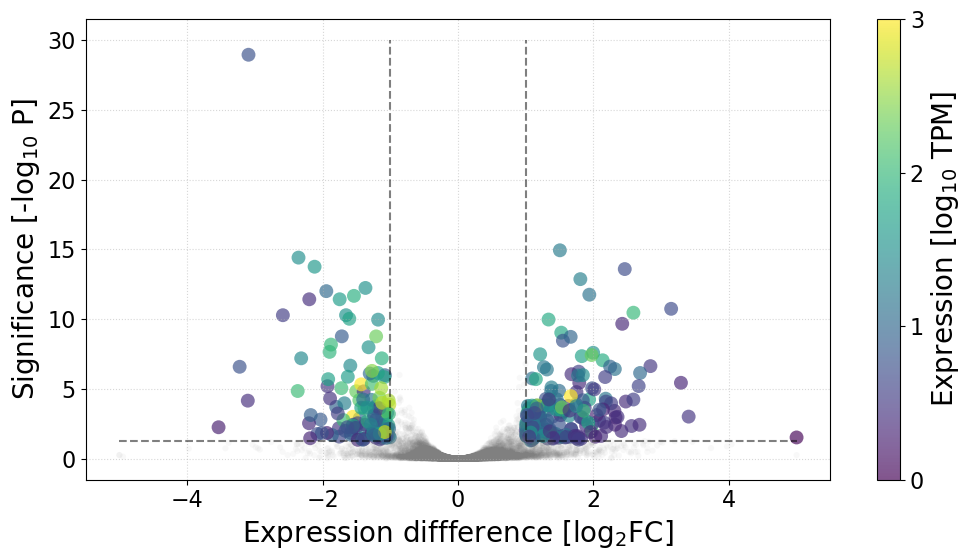

info stored in table
effect_time_3D.tsv	culture	3D	time	True
(1096, 6)
                    baseMean  log2FoldChange     lfcSE        stat  \
ENSG00000000460   702.840488        1.063714  0.173613   36.899489   
ENSG00000002549  2540.152720        1.465465  0.129423  123.653640   
ENSG00000003137   149.471251       -1.397036  0.484083    8.059248   
ENSG00000003147    35.000748       -3.047319  0.676292   18.375201   
ENSG00000006459   531.753165       -1.607305  0.313028   25.284928   

                       pvalue          padj  
ENSG00000000460  1.243785e-09  5.664942e-08  
ENSG00000002549  1.003104e-28  6.624666e-26  
ENSG00000003137  4.527197e-03  2.774790e-02  
ENSG00000003147  1.814037e-05  2.919034e-04  
ENSG00000006459  4.945582e-07  1.258226e-05  
(16263, 6)
                    baseMean  log2FoldChange     lfcSE      stat    pvalue  \
ENSG00000000003  1007.250131       -0.246281  0.160637  2.347834  0.125457   
ENSG00000000419  1993.656550        0.045790  0.145772  0.098665 

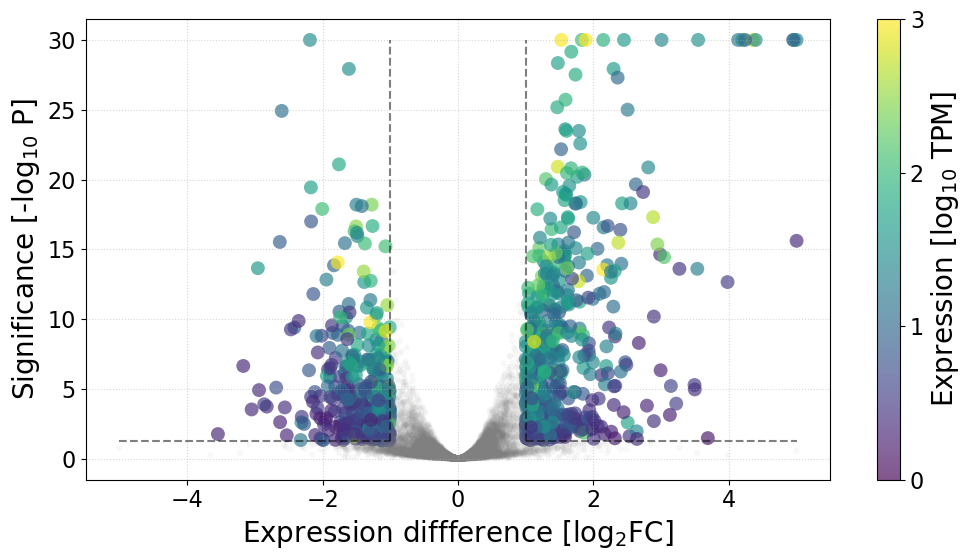

info stored in table
effect_culture_day2.tsv	time	two	culture	
(2160, 6)
                    baseMean  log2FoldChange     lfcSE       stat  \
ENSG00000000938     6.110100        3.598363  1.410452   6.491682   
ENSG00000002587    16.412608        7.367086  1.457000  27.527670   
ENSG00000003137   119.891013        3.142329  0.544767  29.371810   
ENSG00000003147    31.521433        2.598151  0.732189  11.544095   
ENSG00000004478  5129.327170       -1.107265  0.227832  23.069775   

                       pvalue      padj  
ENSG00000000938  1.083804e-02  0.045249  
ENSG00000002587  1.548630e-07  0.000003  
ENSG00000003137  5.974037e-08  0.000001  
ENSG00000003147  6.796478e-04  0.004647  
ENSG00000004478  1.562273e-06  0.000023  
(16095, 6)
                    baseMean  log2FoldChange     lfcSE       stat    pvalue  \
ENSG00000000003  1069.501753       -0.001228  0.162036   0.000064  0.993633   
ENSG00000000419  2231.059113       -0.449918  0.149613   9.009129  0.002686   
ENSG00000000

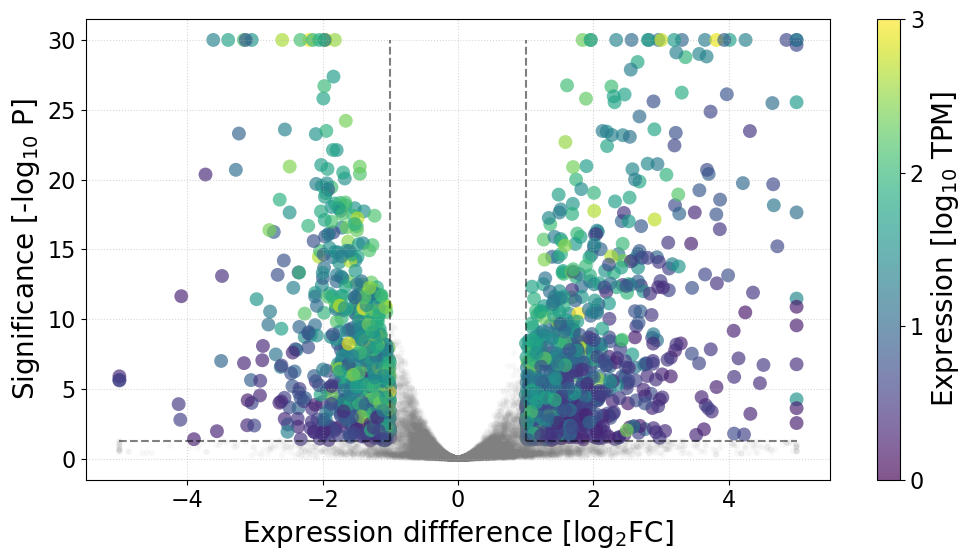

info stored in table
effect_culture_day14.tsv	time	fourteen	culture	
(1014, 6)
                    baseMean  log2FoldChange     lfcSE       stat  \
ENSG00000001561    54.519295       -1.391100  0.491704   7.835426   
ENSG00000001630  1441.746479        1.104641  0.255496  18.278171   
ENSG00000004838   269.582667       -1.284012  0.281336  20.303057   
ENSG00000005108    12.173258        4.429846  1.172169  13.072041   
ENSG00000005448  2649.712157       -1.119770  0.192512  33.052238   

                       pvalue          padj  
ENSG00000001561  5.123208e-03  4.229004e-02  
ENSG00000001630  1.908820e-05  5.027702e-04  
ENSG00000004838  6.609491e-06  1.998443e-04  
ENSG00000005108  2.997363e-04  4.753971e-03  
ENSG00000005448  8.971570e-09  5.549999e-07  
(16330, 6)
                    baseMean  log2FoldChange     lfcSE       stat    pvalue  \
ENSG00000000003   991.158269       -0.242861  0.179602   1.826238  0.176573   
ENSG00000000419  2223.157641       -0.295216  0.201215   2.14

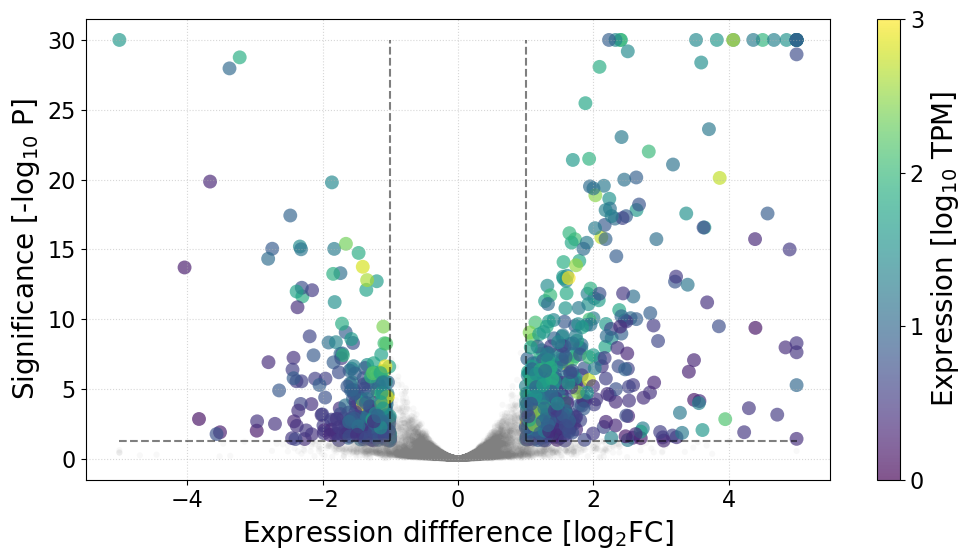

info stored in table
CPU times: user 1min 39s, sys: 70.1 ms, total: 1min 39s
Wall time: 1min 39s


In [7]:
%%time

def volcano_plotter(contrast):

    input_file_name = contrast[0]
    sorting_label_1 = contrast[1]
    sorting_label_2 = contrast[2]
    sorting_label_3 = contrast[3]
    sorting_label_4 = contrast[4]

    # define contrast data
    input_file = data_folder + input_file_name
    df = pandas.read_csv(input_file, sep='\t')
    print(df.shape)
    print(df.head())

    # define contrast antidata
    input_file_name = input_file_name.replace('.tsv', '.anti.tsv')
    input_file = data_folder + input_file_name
    anti = pandas.read_csv(input_file, sep='\t')
    print(anti.shape)
    print(anti.head())

    # subset expression data
    sub = metadata[metadata[sorting_label_1] == sorting_label_2]
    sub = sub.sort_values(sorting_label_3, ascending=bool(sorting_label_4))
    labels = sub['sample']
    subset_tpm = tpm[labels]

    print(labels)
    print(sub)
    print(subset_tpm.head())

    # identify responding genes
    a = subset_tpm[subset_tpm.iloc[:, :3].median(axis=1) > tpm_threshold].index.to_list()
    b = subset_tpm[subset_tpm.iloc[:, 3:].median(axis=1) > tpm_threshold].index.to_list()
    union = list(set(a).union(b))
    print(len(union))
    response_genes = list(set(df.index) & set(union))
    print(len(response_genes))

    # plot
    x = df.loc[response_genes, 'log2FoldChange']
    y = -numpy.log10(df.loc[response_genes, 'padj'])
    z = numpy.log10(subset_tpm.loc[response_genes, :].median(axis=1) + 1)
    
    str_x = ['{:.4f}'.format(element) for element in x]
    str_y = ['{:.2e}'.format(10**(-element)) for element in y]
    str_z = ['{:.2f}'.format(10**(element)) for element in z]
    srt_qr = ['{:.3f}'.format(numpy.sqrt(a**2 + b**2 + c**2)) for a, b, c in zip(x, y, z)]
    
    x = numpy.clip(x, -5, 5)
    y = numpy.clip(y, 0, 30)
    matplotlib.pyplot.scatter(x, y, s=100, c=z, cmap='viridis', 
                              vmin=0, vmax=3, alpha=2/3, edgecolors='none')
    matplotlib.pyplot.colorbar(ticks=[0, 1, 2, 3], label='Expression [log$_{10}$ TPM]')
    
    x = anti['log2FoldChange']
    y = -numpy.log10(anti['padj'])
    x = numpy.clip(x, -5, 5)
    y = numpy.clip(y, 0, 30)
    matplotlib.pyplot.scatter(x, y, color='gray', s=20, alpha=0.05, edgecolors='none')
    
    matplotlib.pyplot.plot([-1, -1], [-numpy.log10(0.05), 30], ls='--', color='black', alpha=0.5)
    matplotlib.pyplot.plot([1, 1], [-numpy.log10(0.05), 30], ls='--', color='black', alpha=0.5)
    matplotlib.pyplot.plot([-5, -1], [-numpy.log10(0.05), -numpy.log10(0.05)], ls='--', color='black', alpha=0.5)
    matplotlib.pyplot.plot([1, 5], [-numpy.log10(0.05), -numpy.log10(0.05)], ls='--', color='black', alpha=0.5)
    
    matplotlib.pyplot.xlabel('Expression diffference [log$_2$FC]')
    matplotlib.pyplot.ylabel('Significance [-log$_{10}$ P]')
    
    matplotlib.pyplot.grid(ls=':', alpha=0.5)
    matplotlib.pyplot.tight_layout()
    matplotlib.pyplot.show()
    matplotlib.pyplot.close()

    # store csv with responding genes
    storing_file = results_dir + input_file_name.replace('.anti.tsv', '.formatted_results.tsv')
    f = open(storing_file, 'w')
    f.write('ENSEMBL\tGene name\tBiotype\tDescription\tContrast median expression [TPM]\tExpression difference [log2 FC]\tSignificance [-log10 adj. P]\tQuantitative relevance\n')
    for i in range(len(response_genes)):

        ensembl = response_genes[i]

        gene_name = annotation[annotation['ensembl_gene_id'] == ensembl]['external_gene_name'].values[0]
        if isinstance(gene_name, str) == False:
            gene_name = 'not_found'

        biotype = annotation[annotation['ensembl_gene_id'] == ensembl]['gene_biotype'].values[0]
        try:
            description = annotation[annotation['ensembl_gene_id'] == ensembl]['description'].values[0].split(' [')[0]
        except:
            description = annotation[annotation['ensembl_gene_id'] == ensembl]['description'].values[0]
        if isinstance(description, str) == False:
            description = 'not_found'
            
        info = [ensembl, gene_name, biotype, description, str_z[i], str_x[i], str_y[i], srt_qr[i]]
        #print(info)
        info_string = '\t'.join(info) 
        f.write('{}\n'.format(info_string))
    f.close()
    print('info stored in table')
        
    return None

contrasts = [['effect_time_2D.tsv', 'culture', '2D', 'time', 'True'], 
             ['effect_time_3D.tsv', 'culture', '3D', 'time', 'True'],
             ['effect_culture_day2.tsv', 'time', 'two', 'culture', ''],
             ['effect_culture_day14.tsv', 'time', 'fourteen', 'culture', '']
            ]

for contrast in contrasts:
    print("\t".join(contrast))
    volcano_plotter(contrast)